<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задача 1**

Даны значения зарплат из выборки выпускников:

_100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150_

Своими руками (т.е. без использования статистических функций вроде mean, std, var) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [2]:
a = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])

manual_mean = sum(a)/len(a)
print(f'средняя выборочная = {manual_mean}')

manual_var_biased = sum((a-manual_mean)**2)/len(a)
print(f'смещенная вариация = {manual_var_biased}')

manual_var_unbiased = sum((a-manual_mean)**2)/(len(a)-1)
print(f'несмещенная вариация = {manual_var_unbiased}')

manual_std_unbiased = manual_var_unbiased**0.5
print(f'несмещенное ст.отклонение = {manual_std_unbiased}')


средняя выборочная = 73.14285714285714
смещенная вариация = 2135.074829931973
несмещенная вариация = 2241.8285714285716
несмещенное ст.отклонение = 47.34795213553139


In [3]:
display(a.mean())
display(a.var(ddof=0))
display(a.var(ddof=1))
display(a.std(ddof=1))

73.14285714285714

2135.0748299319725

2241.828571428571

47.347952135531386

**Задача 2**

Для выборки из задачи 1 найти (также без использования статистических функций) медиану, первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot.

В этой задаче неоднозначности в вычислении квантилей можно разрешать любым способом.

In [4]:
def manual_P50(a):
    a = np.array(sorted(a))
    power = len(a)
    if power%2 != 0: # нечет
        target_index = len(a)//2 + 1
        median = a[target_index-1]
    else:  # чет
        target_index = len(a)//2
        median = (a[target_index-1] + a[target_index])/2
    return median

def quartile(a):
    a = np.array(sorted(a))
    power = len(a)
    if power%2 != 0:
        target_index = len(a)//2 + 1
        left_a = a[:target_index] # выбран вариант включения центрального элемента в оба подмножества
        right_a = a[target_index-1:]
    else:
        target_index = len(a)//2
        left_a = a[:target_index] # выбран вариант включения центрального элемента в оба подмножества
        right_a = a[target_index:]
    return manual_P50(left_a), manual_P50(right_a)

In [5]:
# поиск медианы
print(f'медиана составит {manual_P50(a)}')

# поиск квартиля Q25
q25, q75 = quartile(a)
print(f'1-й квартиль составит {q25}')
print(f'3-й квартиль составит {q75}')
print(f'межквартильный размах составит {q75-q25}')

медиана составит 70
1-й квартиль составит 45
3-й квартиль составит 84
межквартильный размах составит 39


In [6]:
# проверка
b = pd.Series(a)

print(f'медиана - {b.median()}')
print(f'Q25 - {b.quantile(q = 0.25)}')
print(f'Q75 - {b.quantile(q = 0.75)}')
print(f'Q75 - Q25  {b.quantile(q = 0.75) - b.quantile(q = 0.25)}')

медиана - 70.0
Q25 - 45.0
Q75 - 84.0
Q75 - Q25  39.0


имеются выбросы в выборке: [230, 150]


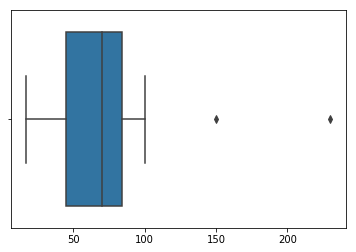

In [7]:
sns.boxplot(a);
outliers = [i for i in a if i>100]
print(f'имеются выбросы в выборке: {outliers}')

**Задача 3**

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

**Решение**


- Пусть Х - событие того что студент сдал экзамен
- Событие Y = {Ya, Yb, Yc} - рассматриваемый студент учится на соотв.факультете
  - распределение вероятностей:
    - Р(Y = Ya) = P(Y = Yb) = 0.25
    - P(Y = Yc) = 0.5 (на основании мощностей факультетов)
- Заданные условные вероятности:
  - Р(X | Ya) = 0.8
  - Р(X | Yb) = 0.7
  - Р(X | Yc) = 0.9
- Мы знаем, что студент сессию сдал => P(X) = 1
- По формуле Байеса: Р(X|Yi) = P(Yi|X) P(X) / P(Yi) => P(Yi|X) = P(X|Yi) P(Yi) / P(X)
  - P(Ya | X) = 0.8 * 0.25  = 0.2
  - P(Yb | X) = 0.7 * 0.25 = 0.175
  - P(Yc | X) = 0.9 * 0.5 = 0.45
- _опционально_: если бы мы не знали, что студент сдал сессию, то его вероятность (Р(Х)) рассчитывалась бы по формуле полной вероятности и составила бы 0.825, тогда соотв.вероятности были бы
  - P(Ya | X) = 0.8 * 0.25 / 0.825 = 0.24(24)
  - P(Yb | X) = 0.7 * 0.25 / 0.825 = 0.21(21)
  - P(Yc | X) = 0.9 * 0.5 / 0.825 = 0.54(54)